# **NHẬN DIỆN 10 LOẠI TRÁI CÂY DÙNG THUẬT TOÁN CNN**



**Load Thư viện**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model

**Liên kết drive**

In [27]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Tạo tập train, validation và test**

In [28]:
train_dataset = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

**Đưa dữ liệu vào các tập train, validation và test**

In [29]:
training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/Python/BTVN3/CNN_NhanDien10LoaiTraiCay/Datasets/Train',
                        target_size=(300, 300),
                        batch_size=50,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Python/BTVN3/CNN_NhanDien10LoaiTraiCay/Datasets/Validation",
                         target_size=(300, 300),
                          batch_size=50,
                         class_mode="categorical")
test_generator = test_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Python/BTVN3/CNN_NhanDien10LoaiTraiCay/Datasets/Test",
                         target_size=(300, 300),
                          batch_size=50,
                         class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 150 images belonging to 10 classes.
Found 10 images belonging to 10 classes.


**Kiểm tra nhãn mỗi loại**

In [30]:
training_generator.class_indices

{'Bưởi': 0,
 'Cam': 1,
 'Cà chua': 2,
 'Chuối': 3,
 'Khóm': 4,
 'Na': 5,
 'Ngô': 6,
 'Sầu Riêng': 7,
 'Táo': 8,
 'Xoài': 9}

**Tạo mô hình**

In [31]:
#CNN
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(300,300,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#ANN
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [32]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                  

**Chạy mô hình**

In [33]:
history = model.fit(training_generator,batch_size=20,epochs=50,verbose=1,validation_data=validation_generator)

Epoch 1/50
15/15 [==============================] - 19s 1s/step - loss: 8.5941 - accuracy: 0.1227 - val_loss: 2.4148 - val_accuracy: 0.1067
Epoch 2/50
15/15 [==============================] - 18s 1s/step - loss: 2.0439 - accuracy: 0.2293 - val_loss: 1.6490 - val_accuracy: 0.3400
Epoch 3/50
15/15 [==============================] - 18s 1s/step - loss: 1.5826 - accuracy: 0.3827 - val_loss: 1.6146 - val_accuracy: 0.3400
Epoch 4/50
15/15 [==============================] - 18s 1s/step - loss: 1.4377 - accuracy: 0.4387 - val_loss: 1.5095 - val_accuracy: 0.4200
Epoch 5/50
15/15 [==============================] - 18s 1s/step - loss: 1.3412 - accuracy: 0.5080 - val_loss: 1.2777 - val_accuracy: 0.4600
Epoch 6/50
15/15 [==============================] - 18s 1s/step - loss: 1.1873 - accuracy: 0.5400 - val_loss: 1.0746 - val_accuracy: 0.5533
Epoch 7/50
15/15 [==============================] - 18s 1s/step - loss: 1.2062 - accuracy: 0.5280 - val_loss: 1.1695 - val_accuracy: 0.4867
Epoch 8/50
15/15 [==

**Lưu mô hình**

In [34]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_NhanDien10LoaiQua.h5')

**Tải mô hình**

In [35]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_NhanDien10LoaiQua.h5')

**Vẽ biểu đồ độ chính xác**

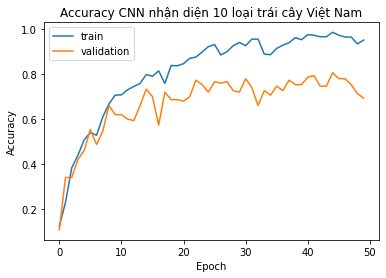

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy CNN nhận diện 10 loại trái cây Việt Nam')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

**Kiểm tra, dự đoán kết quả**

*Nhập thư viện*

In [37]:
#Load thư viện
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

*Kiểm tra tập test*

In [38]:
#Kiểm tra tập test
import numpy as np
result=np.argmax(model.predict(test_generator),axis=1)
result

array([4, 2, 8, 3, 7, 0, 6, 5, 2, 9])

*Kiểm tra ảnh đưa từ bên ngoài*

Đó là quả: Cà chua


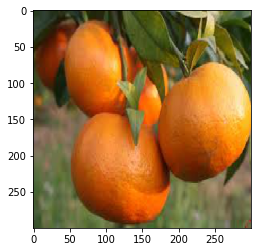

In [39]:
#Load ảnh lên
img=load_img('/content/cam.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đó là quả: Bưởi")
elif result == 1:
    print("Đó là quả: Cam")
elif result == 2:
    print("Đó là quả: Cà chua")
elif result == 3:
    print("Đó là quả: Chuối")
elif result == 4:
    print("Đó là quả: Khóm")
elif result == 5:
    print("Đó là quả: Na")
elif result == 6:
    print("Đó là quả: Ngô")
elif result == 7:
    print("Đó là quả: Sầu riêng")
elif result == 8:
    print("Đó là quả: Táo")
else:
    print("Đó là quả: Xoài")


Đó là quả: Na


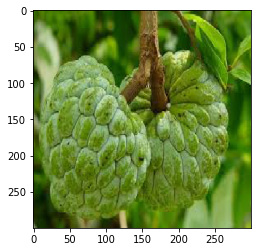

In [40]:
#Load ảnh lên
img=load_img('na.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đó là quả: Bưởi")
elif result == 1:
    print("Đó là quả: Cam")
elif result == 2:
    print("Đó là quả: Cà chua")
elif result == 3:
    print("Đó là quả: Chuối")
elif result == 4:
    print("Đó là quả: Khóm")
elif result == 5:
    print("Đó là quả: Na")
elif result == 6:
    print("Đó là quả: Ngô")
elif result == 7:
    print("Đó là quả: Sầu riêng")
elif result == 8:
    print("Đó là quả: Táo")
else:
    print("Đó là quả: Xoài")

Đó là quả: Ngô


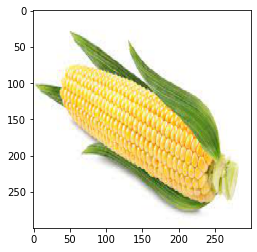

In [41]:
#Load ảnh lên
img=load_img('quango.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đó là quả: Bưởi")
elif result == 1:
    print("Đó là quả: Cam")
elif result == 2:
    print("Đó là quả: Cà chua")
elif result == 3:
    print("Đó là quả: Chuối")
elif result == 4:
    print("Đó là quả: Khóm")
elif result == 5:
    print("Đó là quả: Na")
elif result == 6:
    print("Đó là quả: Ngô")
elif result == 7:
    print("Đó là quả: Sầu riêng")
elif result == 8:
    print("Đó là quả: Táo")
else:
    print("Đó là quả: Xoài")

Đó là quả: Bưởi


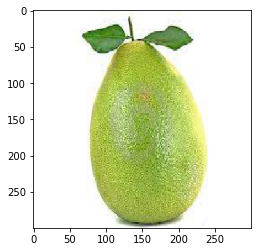

In [42]:
#Load ảnh lên
img=load_img('buoi.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đó là quả: Bưởi")
elif result == 1:
    print("Đó là quả: Cam")
elif result == 2:
    print("Đó là quả: Cà chua")
elif result == 3:
    print("Đó là quả: Chuối")
elif result == 4:
    print("Đó là quả: Khóm")
elif result == 5:
    print("Đó là quả: Na")
elif result == 6:
    print("Đó là quả: Ngô")
elif result == 7:
    print("Đó là quả: Sầu riêng")
elif result == 8:
    print("Đó là quả: Táo")
else:
    print("Đó là quả: Xoài")


Đó là quả: Sầu riêng


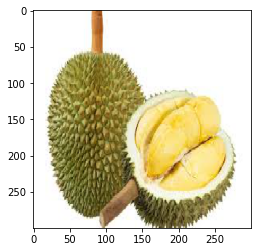

In [43]:
#Load ảnh lên
img=load_img('saurieng.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đó là quả: Bưởi")
elif result == 1:
    print("Đó là quả: Cam")
elif result == 2:
    print("Đó là quả: Cà chua")
elif result == 3:
    print("Đó là quả: Chuối")
elif result == 4:
    print("Đó là quả: Khóm")
elif result == 5:
    print("Đó là quả: Na")
elif result == 6:
    print("Đó là quả: Ngô")
elif result == 7:
    print("Đó là quả: Sầu riêng")
elif result == 8:
    print("Đó là quả: Táo")
else:
    print("Đó là quả: Xoài")

Đó là quả: Khóm


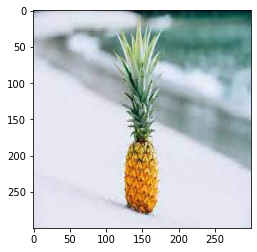

In [44]:
#Load ảnh lên
img=load_img('khom.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đó là quả: Bưởi")
elif result == 1:
    print("Đó là quả: Cam")
elif result == 2:
    print("Đó là quả: Cà chua")
elif result == 3:
    print("Đó là quả: Chuối")
elif result == 4:
    print("Đó là quả: Khóm")
elif result == 5:
    print("Đó là quả: Na")
elif result == 6:
    print("Đó là quả: Ngô")
elif result == 7:
    print("Đó là quả: Sầu riêng")
elif result == 8:
    print("Đó là quả: Táo")
else:
    print("Đó là quả: Xoài")